In [31]:
import fluids.two_phase
import numpy as np
import CoolProp.CoolProp as CP
from scipy.integrate import simpson
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from two_phase_pressure_drop import *
from plot_pressure_drop import *


In [32]:
#d_h = 0.01092#12E-3  # m
#m_dot = 0.0281  # kg/s
tube_options_mm = [10, 10.92, 12, 12.7]
tube_options = []
for tube in tube_options_mm:
    tube_options.append(tube/1000)
mass_rate = np.linspace(0.0056, 0.1944, 100)
x_in = 0.1
x_out = 0.95
T = 4 + 273.15  # 0°C em Kelvin
fluido_padrao = 'R134a'
n=1000

In [33]:
total_vol = 4.109E-4 #m3
tubes = []
for diameter in tube_options:
    length = 4*total_vol/(np.pi * (diameter**2))
    tubes.append([diameter, length])
print(f'tube_options: {tubes}')

tube_options: [[0.01, 5.231741289316784], [0.01092, 4.387336883391687], [0.012, 3.6331536731366554], [0.0127, 3.2436860867485797]]


In [34]:
pressure_drop_list = []
for tube in tubes:
    diameter, length = tube
    delta_p_tube = []
    for m_dot in mass_rate:
        delta_p =pressure_drop_lockhart_martinelli(T=T,
                                                    fluid=fluido_padrao,
                                                    x_in=x_in,
                                                    x_out=x_out,
                                                    m_dot=m_dot,
                                                    d_h=diameter,
                                                    L=length,
                                                    num_dots=n)
        delta_p_tube.append(delta_p[0])
    pressure_drop_list.append(delta_p_tube)

print(pressure_drop_list)



[[np.float64(1713.0690173543674), np.float64(3049.65186127871), np.float64(4748.8477667346915), np.float64(6778.83187687155), np.float64(9128.799949166967), np.float64(11783.183689742009), np.float64(14739.825895294893), np.float64(17985.430745764515), np.float64(21522.872089431774), np.float64(25342.58036390363), np.float64(29440.90433229751), np.float64(33810.35891896139), np.float64(38456.69346918583), np.float64(43368.77315760946), np.float64(48548.6280540464), np.float64(54000.268683595576), np.float64(59704.88509680094), np.float64(65666.35350422263), np.float64(71890.4721437853), np.float64(78365.75044838154), np.float64(85099.10840391173), np.float64(92088.81956202576), np.float64(99322.39986472507), np.float64(106808.29812181497), np.float64(114533.35130141219), np.float64(122506.985664499), np.float64(130740.44320463788), np.float64(139194.78206294158), np.float64(147906.4092522482), np.float64(156847.74003905305), np.float64(166044.9146132903), np.float64(175468.74214946482)

C:\Users\kawan\AppData\Local\Temp\ipykernel_25164\430908008.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('cool', len(tubes))


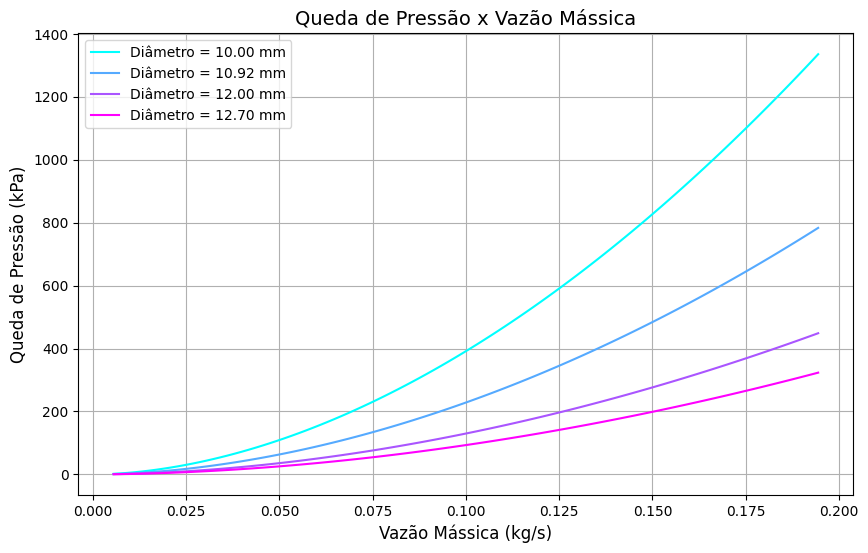

In [35]:
plt.figure(figsize=(10, 6))

# Obtendo o colormap
colormap = cm.get_cmap('cool', len(tubes))
#colormap=plt.colormaps.get_cmap('cool', len(tubes))

# Iterando sobre os tubos e plotando os dados
for i, tube in enumerate(tubes):
    diameter = tube[0]
    # Convertendo a queda de pressão para kPa
    pressure_drop_kpa = [dp / 1000 for dp in pressure_drop_list[i]]
    plt.plot(mass_rate, pressure_drop_kpa, label=f"Diâmetro = {diameter*1000:.2f} mm", color=colormap(i))

plt.title("Queda de Pressão x Vazão Mássica", fontsize=14)
plt.xlabel("Vazão Mássica (kg/s)", fontsize=12)
plt.ylabel("Queda de Pressão (kPa)", fontsize=12)
#plt.yscale("log")  # Configuração da escala logarítmica no eixo Y
plt.legend()
plt.grid(True)

plt.show()
